# Lineær regresjon - to variable

In [1]:
import numpy as np
import os
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

import ipywidgets as widgets
from sklearn.metrics import r2_score

%matplotlib inline

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{00}& x_{10}& x_{20}&\dots& x_{j0} \\
1& x_{01}& x_{11}& x_{21}&\dots& x_{j1} \\
1& x_{02}& x_{12}& x_{22}&\dots& x_{j2} \\                      
\dots& \dots& \dots& \dots&\dots&\dots \\
1& x_{0i}& x_{1i}&x_{2i}&\dots&x_{ji} \\
\end{bmatrix}
$$

In [2]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

# This code generates 30 evenly spaced points in the range from -6 to 6 for both x and y. 
# The linspace function is used for this purpose.
# Make data set
x = np.linspace(-6, 6, 30) 
y = np.linspace(-6, 6, 30)

# The meshgrid function is used to create a 2D grid of coordinates. Given 1D arrays x and y, 
# meshgrid creates two 2D arrays, x_mesh and y_mesh, such that each element of x_mesh corresponds 
# to a specific x coordinate, and each element of y_mesh corresponds to a specific y coordinate. 
# This is often used for evaluating functions over a grid of points.
x_mesh, y_mesh = np.meshgrid(x, y)

#This line evaluates the function f at each point in the meshgrid (x_mesh, y_mesh). 
# The result is a 2D array z where each element corresponds to the function value at the corresponding x and y coordinates.
z = f(x_mesh, y_mesh)



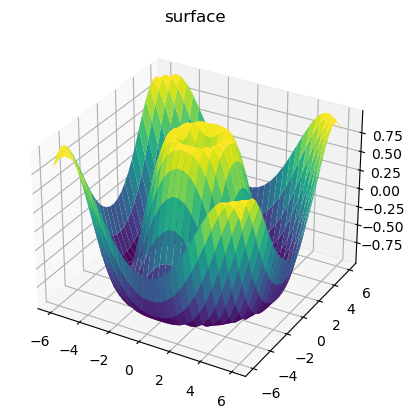

In [3]:
# x_mesh, y_mesh, and z are arrays representing the coordinates and the values of the surface to be plotted.
# rstride and cstride determine the step size used to plot the surface. In this case, both are set to 1, 
# indicating that every point in the arrays will be used for the plot.
# cmap='viridis' specifies the colormap to be used. 'viridis' is a perceptually uniform colormap that is 
# often used for better visualization.
# edgecolor='none' means that the edges of the surface won't have any color, making it visually smoother.

ax = plt.axes(projection='3d') #Create a 3rd plot
ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [4]:
# This code involves preparing data and training a linear regression model using the LinearRegression 
# ravel() is used to flatten both x_mesh and y_mesh into 1D arrays.
# np.vstack((x_mesh.ravel(), y_mesh.ravel())) stacks these two 1D arrays vertically to create a 2D array 
# where each column represents a flattened version of x_mesh and y_mesh.
# np.moveaxis(..., 0, -1) is used to swap the first and last axes, effectively transposing the array. 
# This is done to get the shape compatible with the input requirements of the linear regression model.

# Stacking x and y 
X = np.moveaxis(np.vstack((x_mesh.ravel(), y_mesh.ravel())),0,-1)


# z.flatten() flattens the 2D array z into a 1D array.
# np.expand_dims(z.flatten(), -1) adds a new axis to the flattened z array, converting it into a column vector. 
# This is necessary because the target variable for the linear regression model should be a 2D array (a matrix).

#train model
linreg = LinearRegression()
linreg.fit(X,np.expand_dims(z.flatten(),-1))

LinearRegression()

C:\Users\DianaP\AppData\Local\Temp\ipykernel_49056\2140425287.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


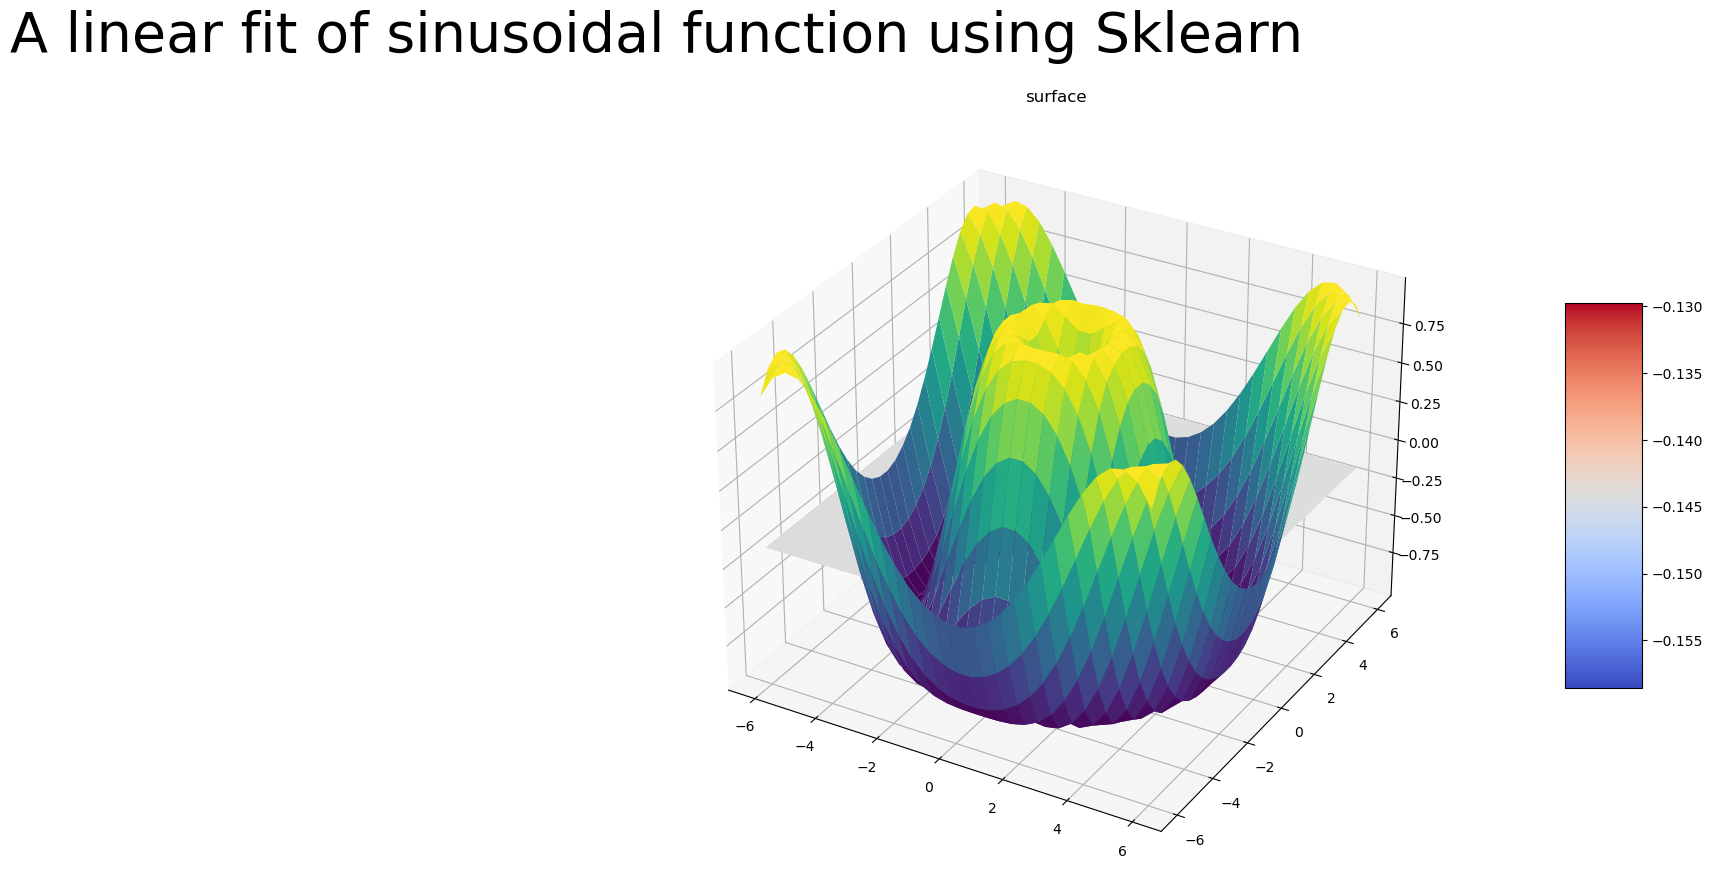

In [5]:
# This code visualizes the original surface (z) and the predicted surface (z_hat) after training a linear regression model. 

# This line uses the trained linear regression model (linreg) to predict the values (z_hat) based on the input data X. 
# The predict method takes the input data and returns the predicted values.
z_hat=linreg.predict(X)

# The predicted values (z_hat) are reshaped into a 2D array (z_hat_plot) using the reshape method. 
# The shape of z_hat is assumed to be a perfect square, and the dimensions are determined by 
# taking the square root of the total number of elements in z_hat.
z_hat_plot = z_hat.reshape(int(math.sqrt(z_hat.shape[0])),int(math.sqrt(z_hat.shape[0])))

# Creating a 3D Plot:
fig = plt.figure(figsize=(32,10))
ax = plt.axes(projection='3d')

# Plotting the Original Surface:
surf2 = ax.plot_surface(x_mesh, y_mesh, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

# Plotting the Predicted Surface:
surf = ax.plot_surface(x_mesh, y_mesh, z_hat_plot, rstride=1, cstride=1,
            cmap='coolwarm', edgecolor='none',antialiased=False)

ax.set_title('surface')
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A linear fit of sinusoidal function using Sklearn" ,fontsize="40", color = "black")
fig.show()


C:\Users\DianaP\AppData\Local\Temp\ipykernel_49056\1767934103.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


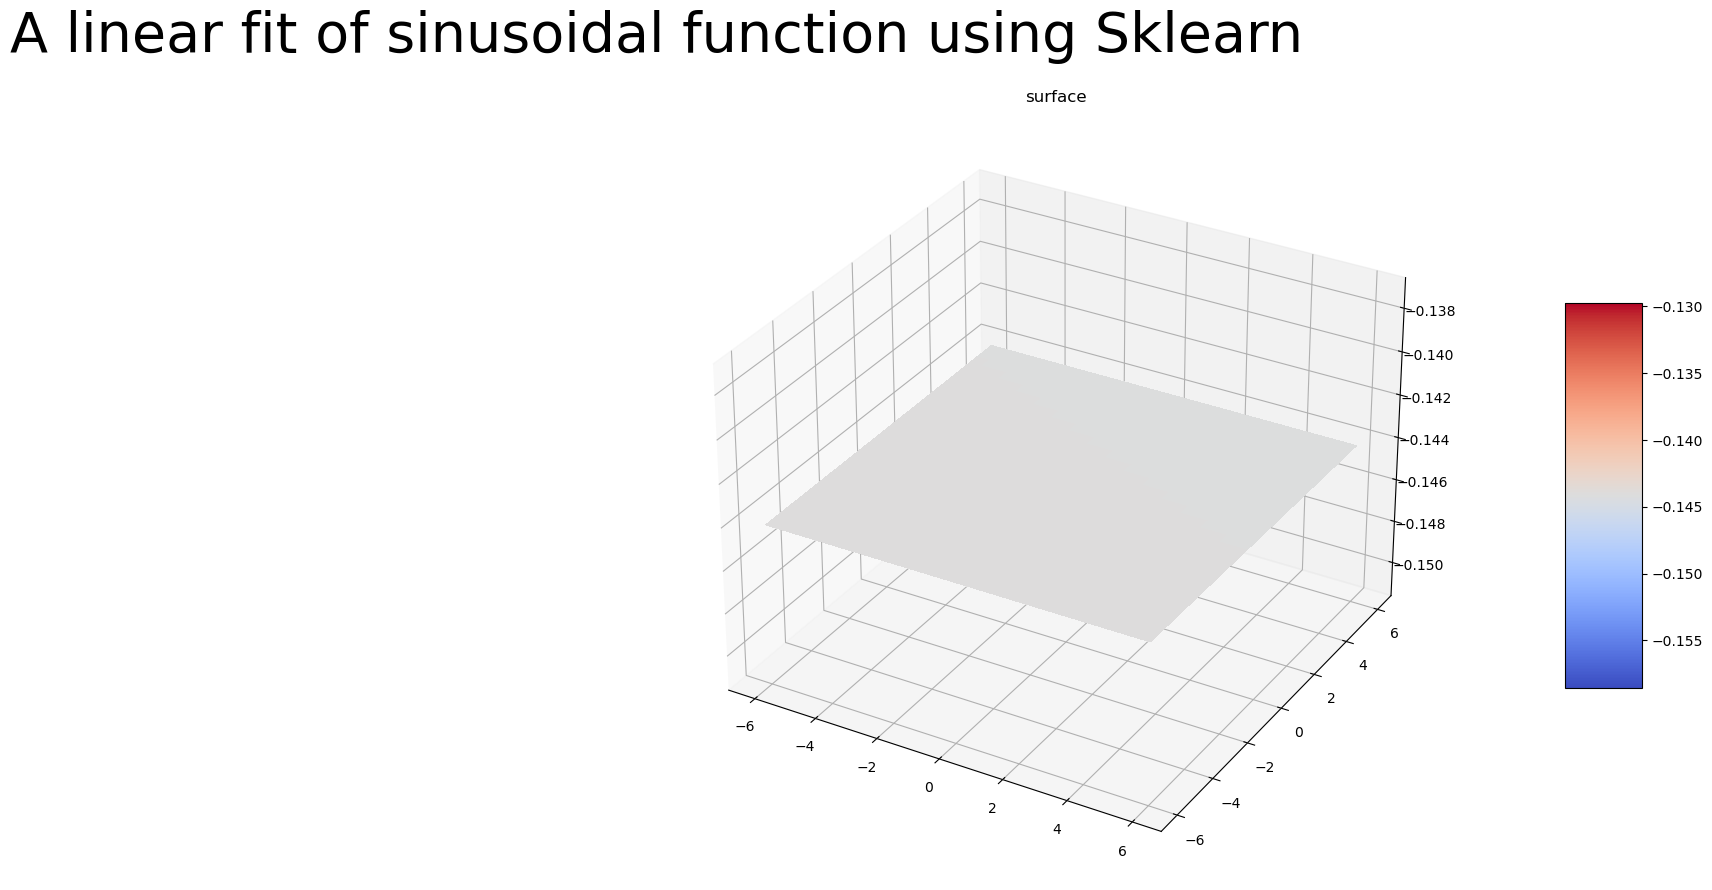

In [6]:
z_hat=linreg.predict(X)

z_hat_plot = z_hat.reshape(int(math.sqrt(z_hat.shape[0])),int(math.sqrt(z_hat.shape[0])))

fig = plt.figure(figsize=(32,10))
ax = plt.axes(projection='3d')


surf = ax.plot_surface(x_mesh, y_mesh, z_hat_plot, rstride=1, cstride=1,
            cmap='coolwarm', edgecolor='none',antialiased=False)

ax.set_title('surface')
fig.colorbar(surf,shrink=0.5, aspect=5)
fig.suptitle("A linear fit of sinusoidal function using Sklearn" ,fontsize="40", color = "black")
fig.show()
